In [1]:
import os
from pydicom import dcmread
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale, rotate, iradon
import cv2
import numpy as np
from tqdm import tqdm
import polars as pl

import tigre
import numpy as np
from tigre.utilities import sample_loader
from tigre.utilities import CTnoise
import tigre.algorithms as algs

In [2]:
# _pth = os.path.join(os.path.dirname(os.getcwd()), 'dataset', '2')
_pth = r'F:\EPID Images\cube\854320164'
_pth = r'F:\EPID Images\sphere\854320165'
_files = os.listdir(_pth)

In [3]:
dcm = dcmread(os.path.join(_pth, _files[0]))

In [4]:
SID = dcm.RTImageSID
SAD = dcm.RadiationMachineSAD
print(SID, SAD)

1499.98304881781 1000


In [5]:
geo = tigre.geometry()
geo.DSD = float(SID)
geo.DSO = float(SAD)

In [6]:
g_angle = []
_images = np.zeros((len(_files),1190, 1190), dtype=np.uint16)
prev = np.zeros((1190, 1190), dtype=np.uint16)
curr = np.zeros((1190, 1190), dtype=np.uint16)
_raw_datas = []
for idx, _fname in enumerate(tqdm(_files)):
    raw = dcmread(os.path.join(_pth, _fname))
    curr = raw.pixel_array
    
    _m = curr - prev
    if np.min(_m) > 10000:
        _images[idx, :, :] = _images[idx-1, :, :]
        g_angle.append(g_angle[idx-1])
    else:
        _images[idx, :, :] = curr - prev
        prev = curr
        g_angle.append(raw.GantryAngle)

  0%|          | 0/412 [00:00<?, ?it/s]

100%|██████████| 412/412 [00:02<00:00, 155.52it/s]


In [7]:
g_angle = np.array(g_angle).astype(np.float32)

In [8]:
_images = np.array(_images).astype(np.float32)

In [9]:
def normalize_image(image):
    img_min = np.min(image)
    img_max = np.max(image)
    normalized_image = (image - img_min) / (img_max - img_min)
    return normalized_image

In [10]:
_img = normalize_image(_images)

In [11]:
geo = tigre.geometry(
    mode="parallel", nVoxel=np.array([1190, 1190, len(_files)])
)
geo.DSD = float(SID)
geo.DSO = float(SAD)

In [12]:
imgFBP = algs.fbp(_img, geo, g_angle)

: 

In [ ]:
# test = algs.ossart(_img, geo, g_angle, 1)

OSSART algorithm in progress.


: 

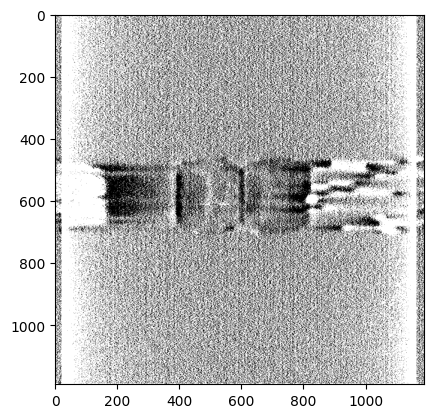

In [ ]:
plt.imshow(((imgFBP[:,:,400] + 2)*40).astype(np.uint8) + 200, cmap='gray')

In [ ]:
len(imgFBP)

1190

In [ ]:
# for i in range(len(g_angle)):
#     img = ((imgFBP[:,:,i] + 2)*40).astype(np.uint8) + 50
    
#     cv2.putText(img, str(i), org=(10, 30), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)
#     _rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
#     cv2.imshow('img', _rgb)

#     if cv2.waitKey(1) & 0xFF == ord('q'): 
#         break
# cv2.destroyAllWindows()


In [ ]:
img.max()

255